In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [8]:
ls ../../data/*.csv

../../data/BB_count_tbl.csv         ../../data/hit.csv                  ../../data/object_ground_truth.csv
../../data/COCO_ground_truth.csv    ../../data/hit_mturk.csv            ../../data/object_location.csv
../../data/approved_object_tbl.csv  ../../data/image.csv                ../../data/worker.csv
../../data/bounding_box.csv         ../../data/object.csv


In [5]:
ls *.csv

HIT_Timing.csv               metric_distr_fitting.csv
computed_my_COCO_BBvals.csv  my_ground_truth.csv


In [9]:
import pandas as pd

In [10]:
hit_tbl  = pd.read_csv("../../data/hit.csv")

In [16]:
import ast 

In [29]:
duration_lst = []
for time_lst in hit_tbl["times"]: 
    try:
        t_lst = ast.literal_eval(time_lst)
        usage_duration = t_lst[-1]-t_lst[0]
        duration_lst.append(usage_duration)
    except(ValueError):
        print time_lst

nan


In [34]:
#measured as Date.now() in JS [see idenitfy.html ] as milliseconds elapsed since UTC, so the duration is measured in ms 
duration_lst=np.array(duration_lst)/1000

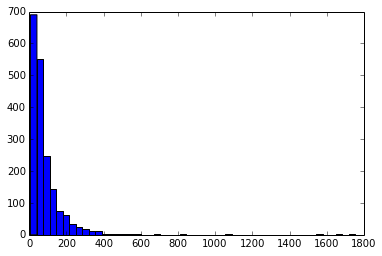

In [38]:
h = plt.hist(duration_lst,bins=50)

In [35]:
np.mean(duration_lst)

83.962413975648488

In [45]:
count_task_per_worker = list(hit_tbl.groupby('worker_id')['id'].count())

In [49]:
np.mean(count_task_per_worker)

10.155913978494624

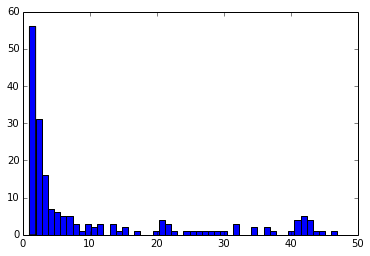

In [48]:
h =plt.hist(count_task_per_worker,bins=50)

# Plot worker distribution for each image

In [3]:
import pandas as pd 

In [4]:
bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')

In [104]:
bb_info.drop('worker_id',axis=1).groupby('object_id')

In [ ]:
bb_info.drop('worker_id',axis=1).groupby('object_id').hist

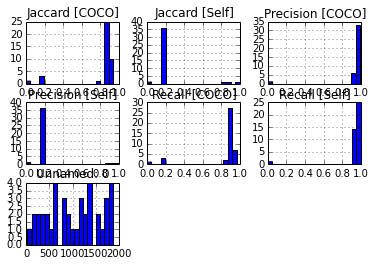

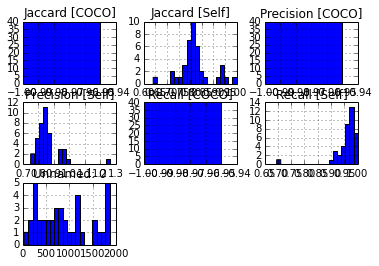

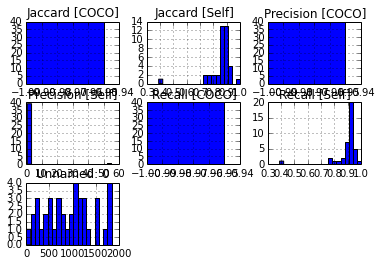

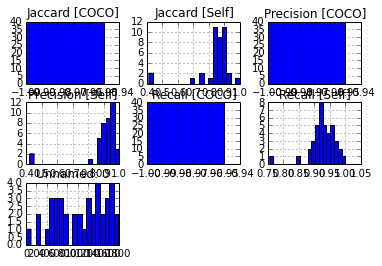

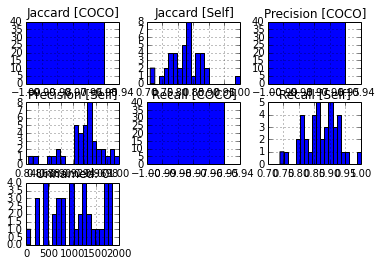

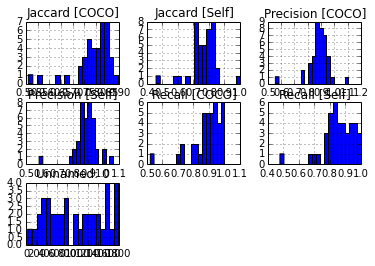

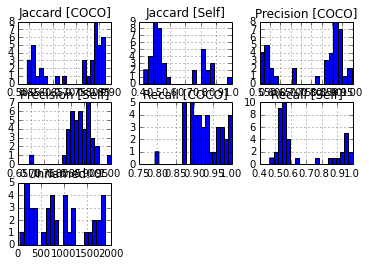

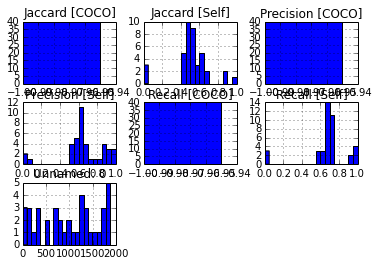

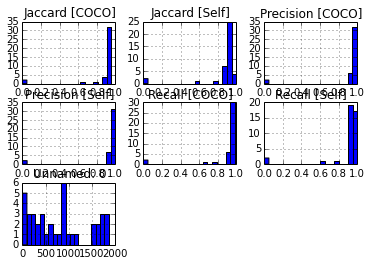

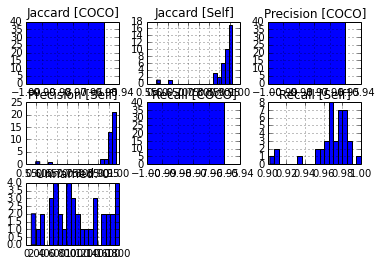

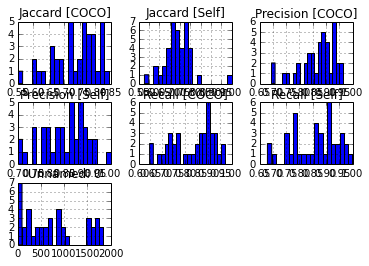

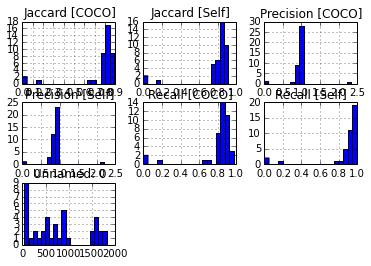

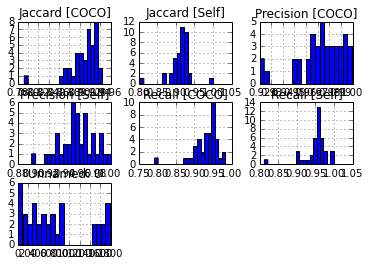

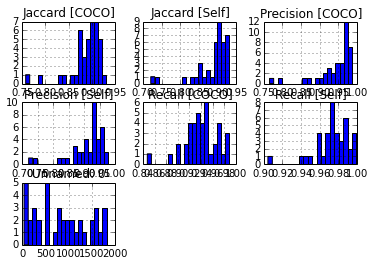

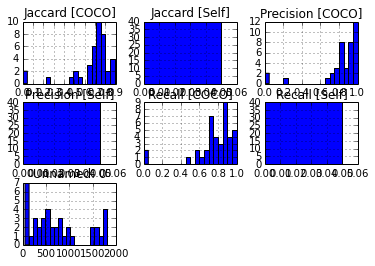

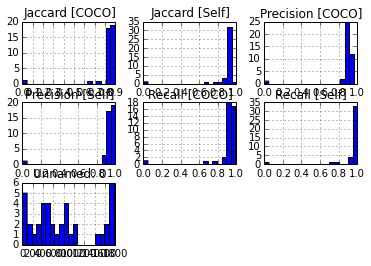

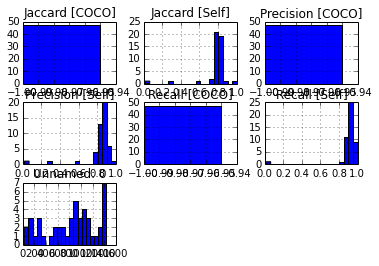

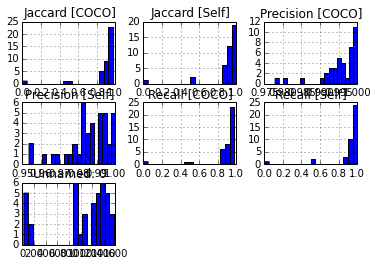

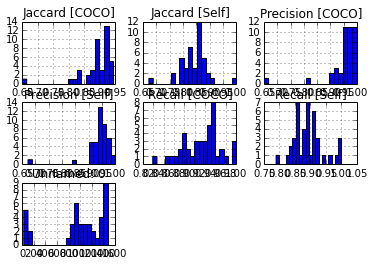

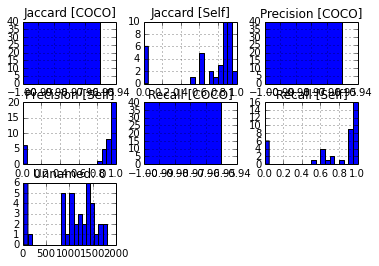

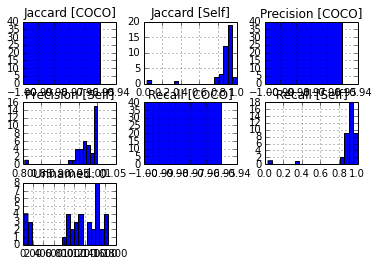

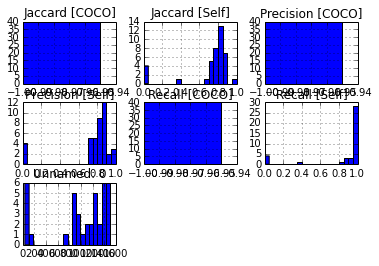

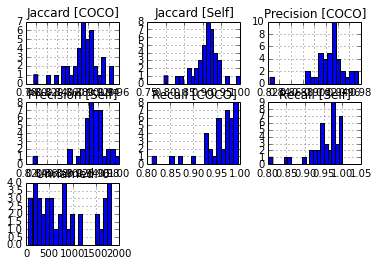

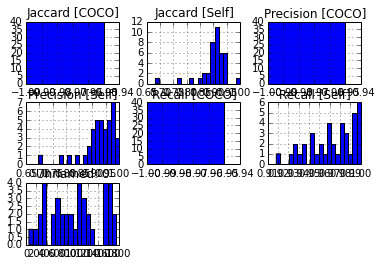

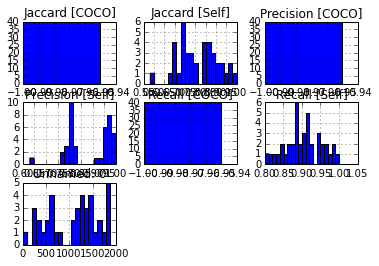

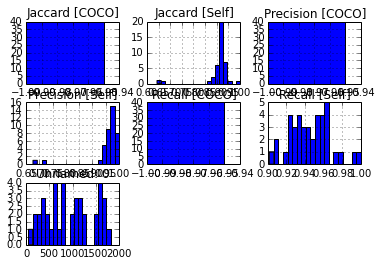

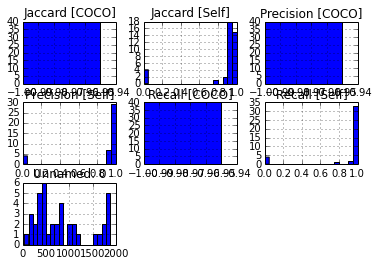

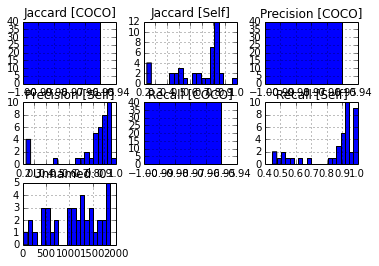

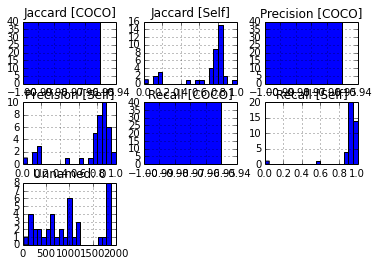

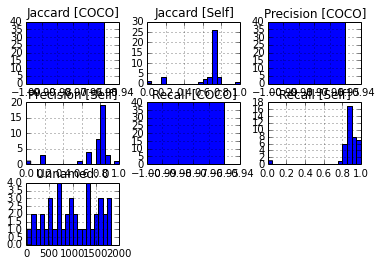

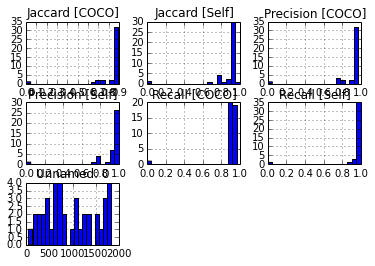

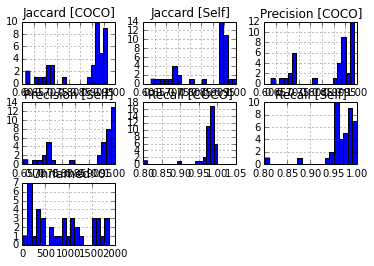

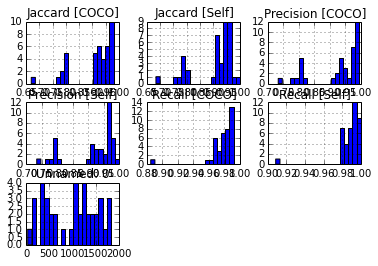

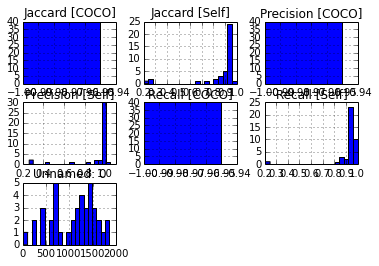

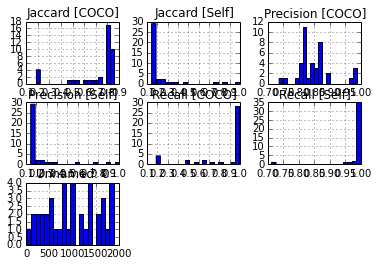

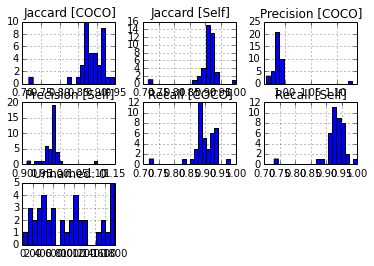

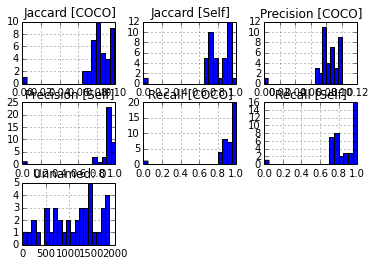

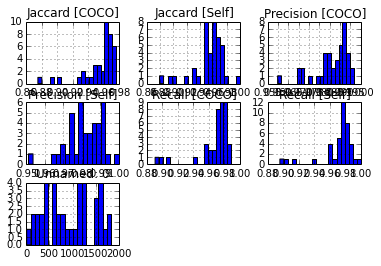

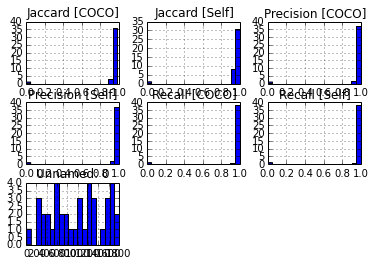

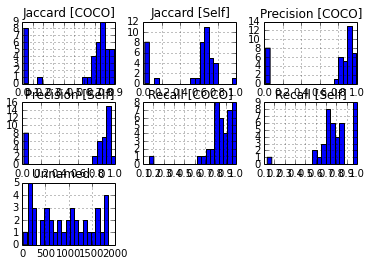

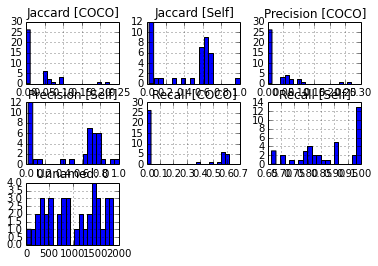

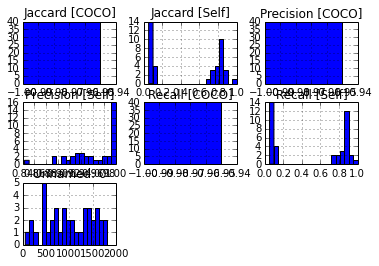

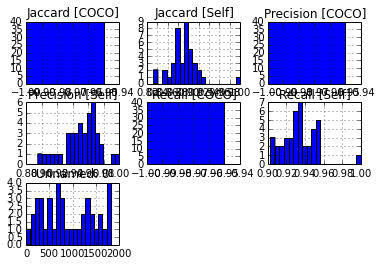

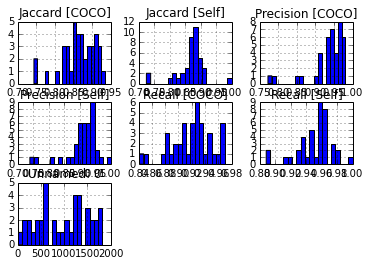

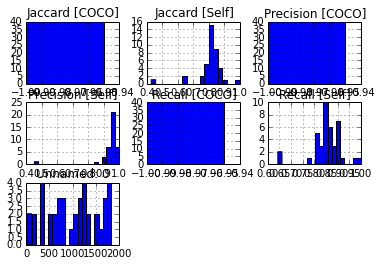

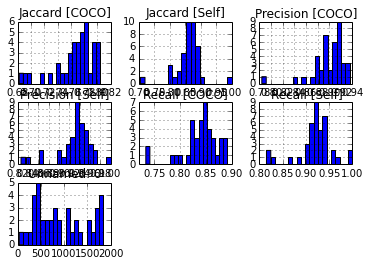

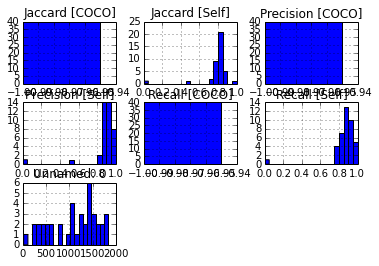

In [99]:
hist =  bb_info.drop('worker_id',axis=1).groupby('object_id').hist(bins=20,range=(0,1.1),normed=1)

The big blotches are caused by flagged -1 COCO entries that do not have a COCO matching 

In [5]:
obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [Self]']!=0].sort('object_id')

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [6]:
object_id_lst  = list(set(obj_sorted_tbl.object_id))

In [7]:
from scipy import stats

In [8]:
# bb_info[bb_info['Jaccard [COCO]']!=-1].groupby('object_id').hist()

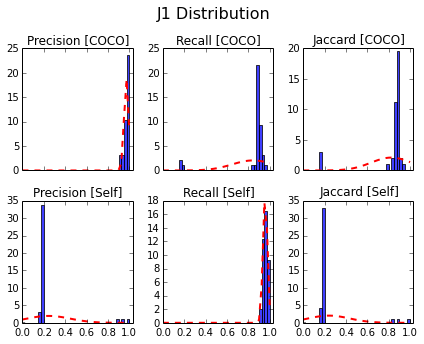

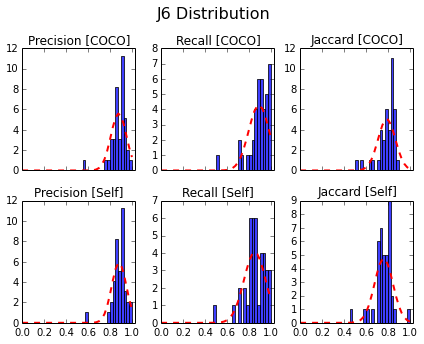

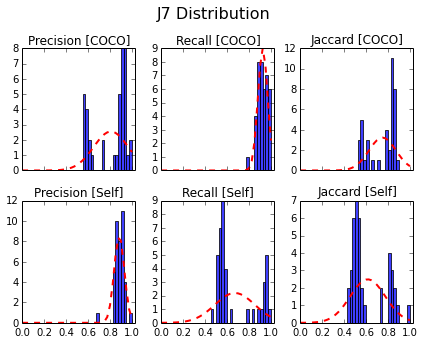

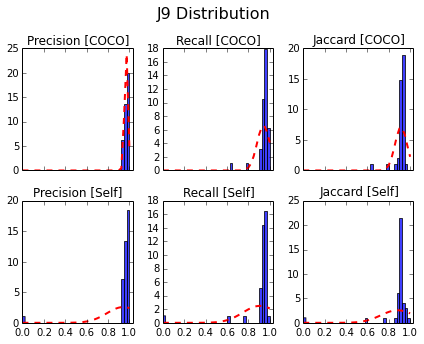

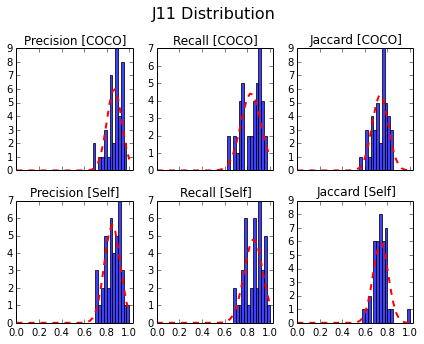

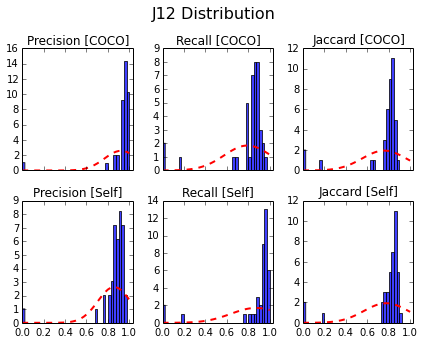

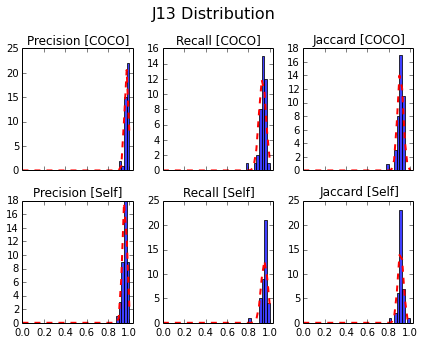

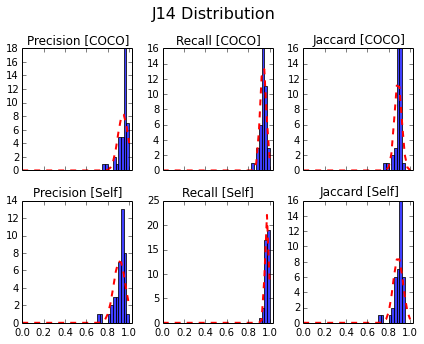

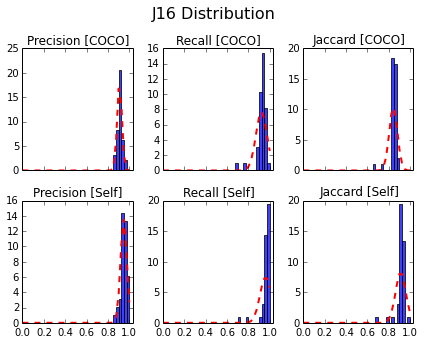

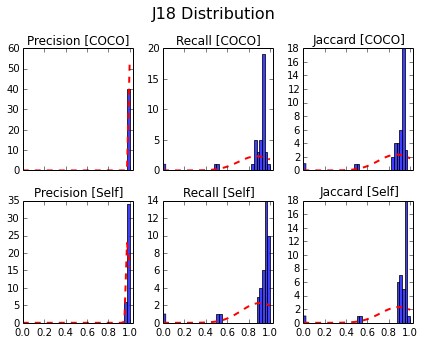

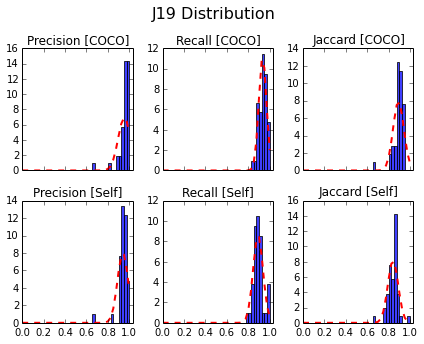

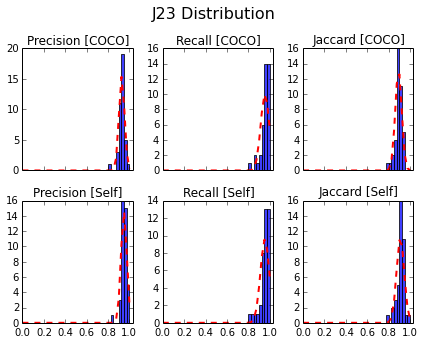

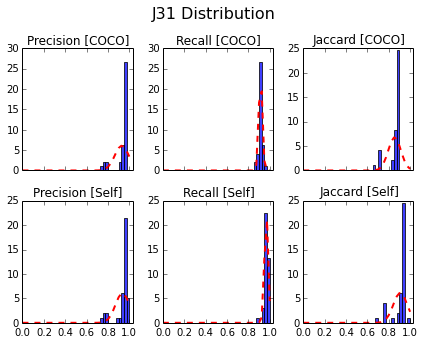

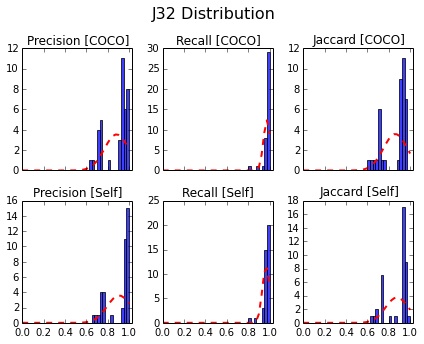

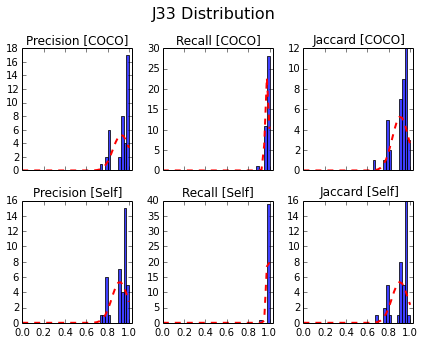

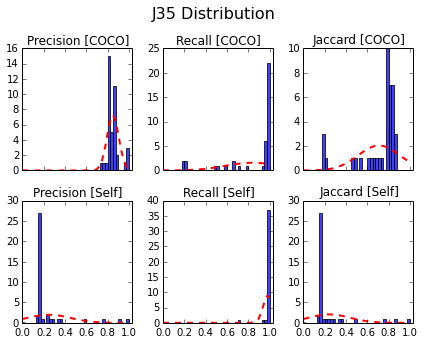

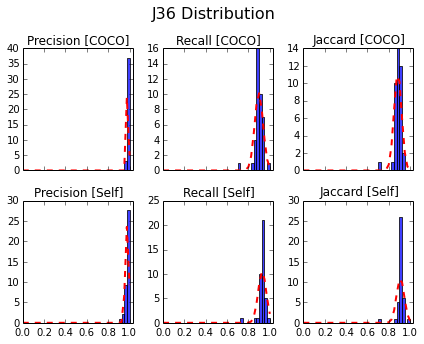

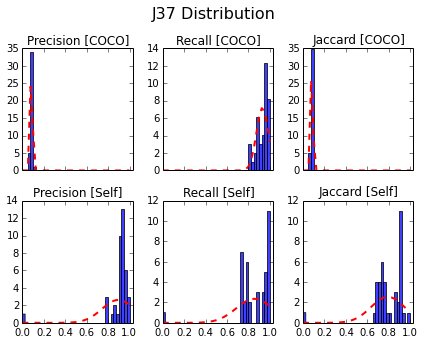

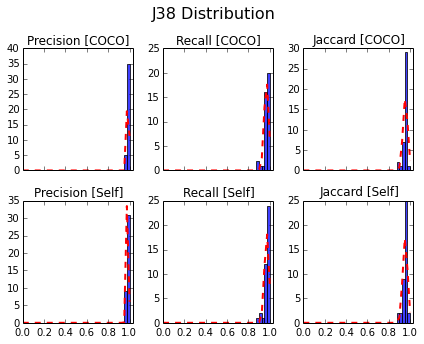

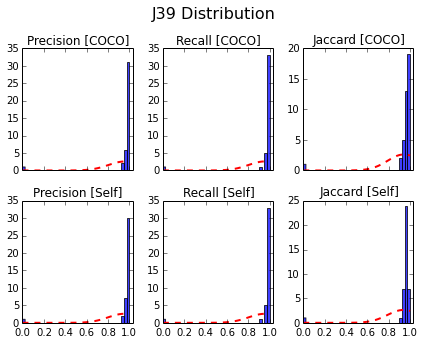

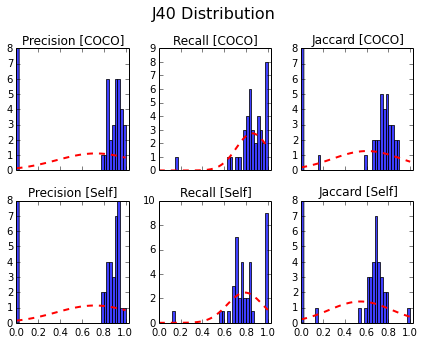

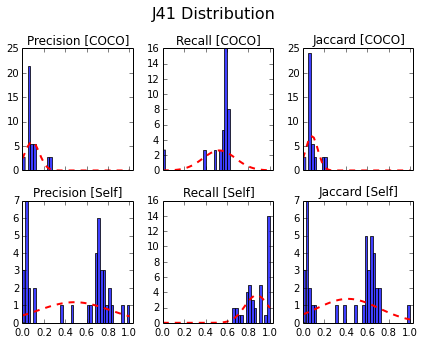

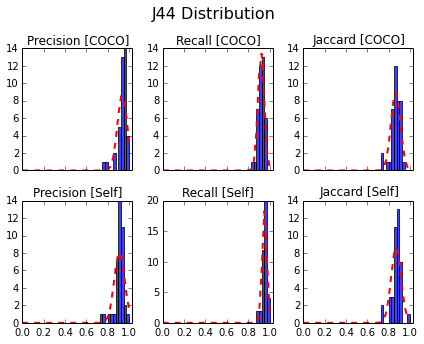

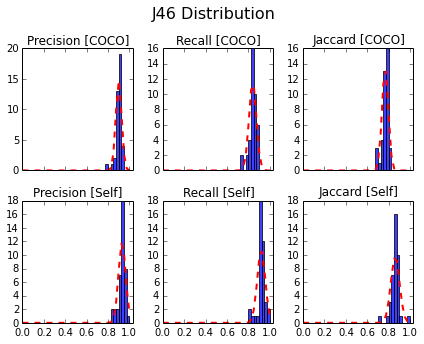

In [14]:
fcn  = stats.norm
metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',\
               'Precision [Self]','Recall [Self]','Jaccard [Self]']
NUM_COL = 3
NUM_ROW = 2
NUM_PLOTS = NUM_COL*NUM_ROW

for objid in object_id_lst:
    fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_ROW*3,NUM_COL*1.5), sharex='col')
    stitle = fig.suptitle("J{} Distribution ".format(objid),fontsize=16,y=1.05)
    axs = axs.ravel()
    # Ji is the set of all workers that annotated object i 
    Ji_tbl = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]
    bb_info = Ji_tbl
    for i,metric in zip(range(len(metrics_lst)),metrics_lst):
        metric_value = np.array(bb_info[metric][bb_info[metric]>0][bb_info[metric]<=1]) 
        ax = axs[i]
        ax.set_title(metric)
        #ax.hist(metric_value,bins=30)
        ax.set_xlim(0,1.03)

        metric_value = np.array(bb_info[metric][bb_info[metric]>0][bb_info[metric]<=1]) 
        params = fcn.fit(metric_value)
    #     histo,bin_edges = np.histogram(metric_value, 50, normed=1)
    #     bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
        n, bins, patches = ax.hist(metric_value, 40, normed=1, range=(0,1),facecolor='blue', alpha=0.75)
        y = fcn.pdf(bins, *params)
        l = ax.plot(bins, y, 'r--', linewidth=2) 

    fig.tight_layout()
# fig.savefig('{}_fitted_worker_histogram.pdf'.format(fcn.name), bbox_inches='tight',bbox_extra_artists=[stitle])

need to add range=(0,1) in order to have even bins across all ranges, otherwise, if not provided range is min(x) and max(x) which is different for each data , so the number of entries in x is different for each dataset, differing bar width makes it hard for the results to be interpretable and tune binsize 

In [19]:
exclude= ['division', 'skellam', 'nbinom', 'logser', 'erlang','dlaplace', 'hypergeom', 'bernoulli', 'levy_stable', 'zipf', 'rv_discrete', 'rv_frozen', 'boltzmann', 'rv_continuous', 'entropy', 'randint', 'poisson', 'geom', 'binom', 'planck', 'print_function']
fcn_lst =  filter(lambda x: x not in exclude,dir(stats.distributions)[9:])

In [20]:
fcn_lst

['alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'expon',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',
 'rice',
 'semicircular',
 't',
 'triang',
 'truncexpon',
 'truncnorm',
 'tukeylambda',
 'uniform',
 'vonmises',
 'vonmises_lin